In [5]:
import glob
import re
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import dja_sepp

In [6]:
home = "/home/aurelien/DAWN/DJA-SEpp"
field = 'ceers-full-grizli-v7.2'

In [7]:
with fits.open(glob.glob(f"{home}/fields/{field}/catalog/dja/*fix_phot_apcorr.fits")[0]) as hdul:
    phot_dja = Table(hdul[1].data)
phot_tiles = []
tiles = glob.glob(f"{home}/fields/{field}/sepp/*sci_cutout*tile-[!full]*sepp_cat.fits")
tiles.sort()
for tile in tiles:
    with fits.open(tile) as hdul:
        phot_tiles.append(Table(hdul[1].data))

In [8]:
print(f"{'Sources in DJA catalog':<28} : {len(phot_dja)}")
# print(phot_dja.keys())
for i, tile in enumerate(phot_tiles):
    print(f"{f'Sources in SE++ catalog ({i})':<28} : {len(tile)}")
    # print(len(tile.keys()))

Sources in DJA catalog       : 76637
Sources in SE++ catalog (0)  : 2111
Sources in SE++ catalog (1)  : 1691
Sources in SE++ catalog (2)  : 3744
Sources in SE++ catalog (3)  : 2063
Sources in SE++ catalog (4)  : 1639
Sources in SE++ catalog (5)  : 2390
Sources in SE++ catalog (6)  : 2032
Sources in SE++ catalog (7)  : 1787
Sources in SE++ catalog (8)  : 1821


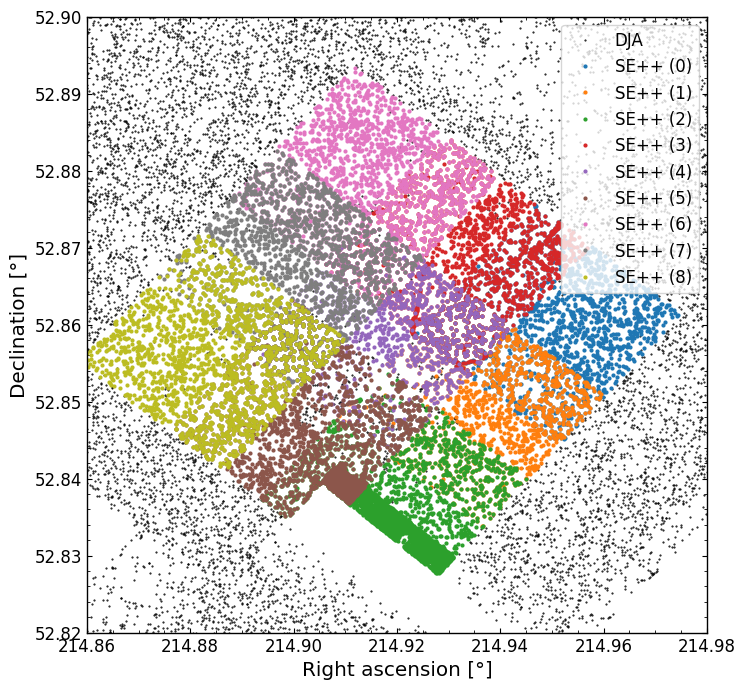

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(phot_dja['ra'], phot_dja['dec'], marker='o', ls='', ms=0.5, c='k', label='DJA')
for i, tile in enumerate(phot_tiles):
    ax.plot(tile['world_centroid_alpha'], tile['world_centroid_delta'], marker='o', ls='', ms=2, label=f'SE++ ({i})')
ax.set_xlabel('Right ascension [°]')
ax.set_ylabel('Declination [°]')
ax.set_xlim(214.86, 214.98)
ax.set_ylim(52.82, 52.90)
ax.legend()
plt.show()

In [10]:
phot_full = dja_sepp.merge_tiles(phot_tiles)
name = re.sub('tile-\d+','tile-full',tiles[0].split('/')[-1])
phot_full.write(f"{home}/fields/{field}/sepp/{name}", format='fits', overwrite=True)

In [12]:
import dja_sepp
home = "/home/aurelien/DAWN/DJA-SEpp"
field = 'ceers-full-grizli-v7.2'
filter_list = dja_sepp.get_filter_list(phot_full.keys())
print("====== Data ========")
wcs, shape = dja_sepp.merge_images(f"{home}/fields/{field}/image/tiles", filter_list, type='', exact=False, verbose=True)
print("====== Resid =======")
dja_sepp.merge_images(f"{home}/fields/{field}/sepp/checkimages", filter_list, wcs=wcs, shape=shape, type='resid', verbose=True)
print("====== Model =======")
dja_sepp.merge_images(f"{home}/fields/{field}/sepp/checkimages", filter_list, wcs=wcs, shape=shape, type='model', verbose=True)

====== Data ========
Finding optimal WCS
---- F115W ----
F115W : ['/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cutout_tile-0.fits', '/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cutout_tile-1.fits', '/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cutout_tile-2.fits', '/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cutout_tile-3.fits', '/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cutout_tile-4.fits', '/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cutout_tile-5.fits', '/home/aurelien/DAWN/DJA-SEpp/fields/ceers-full-grizli-v7.2/image/tiles/ceers-full-grizli-v7.2-f115w-clear_drc_sci_cut

(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN' 'DEC--TAN' 
 CRVAL : 214.91999999999996 52.87 
 CRPIX : 2787.0000000025952 3171.00000000009 
 PC1_1 PC1_2  : 0.7660444431190024 -0.6427876096865103 
 PC2_1 PC2_2  : 0.6427876096865103 0.7660444431190024 
 CDELT : -1.1111111111110932e-05 1.1111111111110932e-05 
 NAXIS : 0  0,
 (4500, 4501))

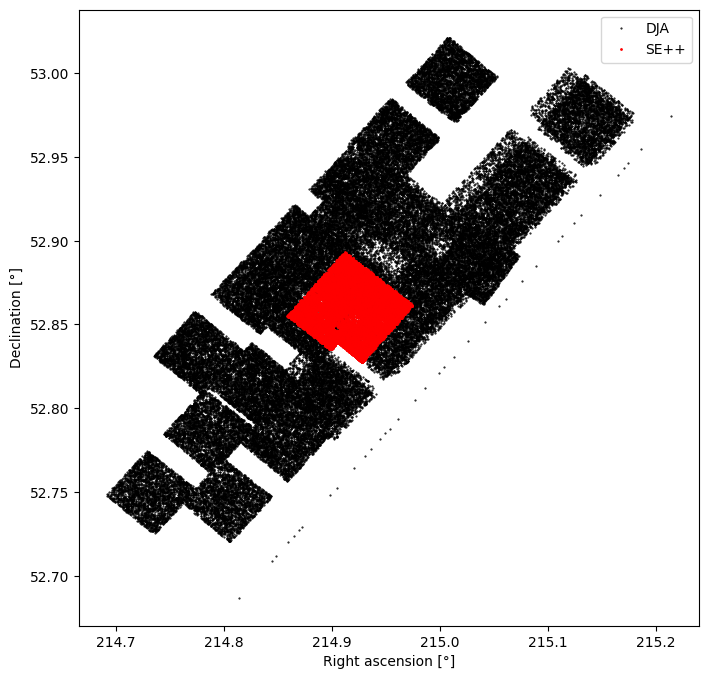

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(phot_dja['ra'], phot_dja['dec'], marker='o', ls='', ms=0.5, c='k', label='DJA')
ax.plot(phot_full['world_centroid_alpha'], phot_full['world_centroid_delta'], marker='o', ls='', ms=1, c='r', label=f'SE++')
ax.set_xlabel('Right ascension [°]')
ax.set_ylabel('Declination [°]')
# ax.set_xlim(214.86, 214.98)
# ax.set_ylim(52.83, 52.90)
ax.legend()
plt.show()